<a href="https://colab.research.google.com/github/ir1ss/DeepLearningWithPython/blob/main/movieClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
train_data[0]

In [8]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

In [5]:
import numpy as np

In [16]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
       results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequences(train_data)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
x_test = vectorize_sequences(test_data)

In [19]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')

In [21]:
y_test = np.asarray(test_labels).astype('float32')

In [23]:
a = np.zeros((3, 3))

In [24]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [25]:
b = np.asarray(a)

In [26]:
b

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [27]:
a[0][0] = 1
a

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
b

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'] 
)

In [33]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [34]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 4s 103ms/step - loss: 0.5916 - accuracy: 0.7107 - val_loss: 0.4080 - val_accuracy: 0.8499
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3282 - accuracy: 0.9027 - val_loss: 0.3072 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2314 - accuracy: 0.9278 - val_loss: 0.2791 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1785 - accuracy: 0.9425 - val_loss: 0.2826 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1465 - accuracy: 0.9525 - val_loss: 0.2802 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1237 - accuracy: 0.9635 - val_loss: 0.2968 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0959 - accuracy: 0.9726 - val_loss: 0.3256 - val_accuracy: 0.8770
Epoch 8/20
3

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

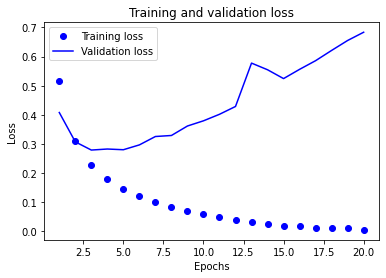

In [39]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') #bo表示以蓝色圆点的形式展示
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #b表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 4,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 1s 42ms/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 0.7197 - val_accuracy: 0.8657
Epoch 2/4
30/30 [==============================] - 1s 31ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.7480 - val_accuracy: 0.8644
Epoch 3/4
30/30 [==============================] - 1s 31ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 0.7820 - val_accuracy: 0.8640
Epoch 4/4
30/30 [==============================] - 1s 31ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.8040 - val_accuracy: 0.8645


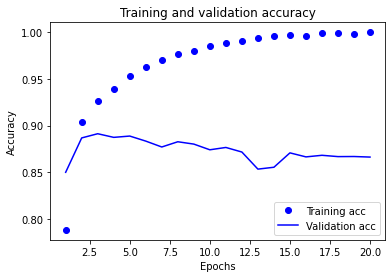

In [42]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') #bo表示以蓝色圆点的形式展示
plt.plot(epochs, val_acc, 'b', label='Validation acc') #b表示蓝色实线
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
model.predict(x_test)

array([[0.00395849],
       [1.        ],
       [0.99772906],
       ...,
       [0.00106472],
       [0.0195998 ],
       [0.88454777]], dtype=float32)